<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.460646,32.005149,58.839250,-0.162967,122.142078,122.272895,-0.130817
1,0.0,1.0,96.776052,56.253964,59.214211,0.098768,222.342995,222.331890,0.011105
2,0.0,2.0,78.175757,92.671812,73.286919,0.043974,254.178462,254.179788,-0.001325
3,0.0,3.0,22.734575,50.100268,60.939567,0.030077,143.804487,143.737319,0.067169
4,0.0,4.0,51.703252,41.600700,36.652339,0.096130,140.052421,139.962699,0.089722
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.326322,80.586735,37.821176,-0.030843,149.703390,149.781074,-0.077684
19996,999.0,16.0,74.471926,92.223822,72.650865,-0.023180,249.323433,249.380761,-0.057328
19997,999.0,17.0,76.705270,99.344156,36.119146,0.065441,222.234014,222.180946,0.053068
19998,999.0,18.0,78.933059,74.361759,44.621691,-0.000685,207.915824,207.902490,0.013334


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.460646  32.005149  58.839250 -0.162967  122.142078   
      1.0    96.776052  56.253964  59.214211  0.098768  222.342995   
      2.0    78.175757  92.671812  73.286919  0.043974  254.178462   
      3.0    22.734575  50.100268  60.939567  0.030077  143.804487   
      4.0    51.703252  41.600700  36.652339  0.096130  140.052421   
...                ...        ...        ...       ...         ...   
999.0 15.0   21.326322  80.586735  37.821176 -0.030843  149.703390   
      16.0   74.471926  92.223822  72.650865 -0.023180  249.323433   
      17.0   76.705270  99.344156  36.119146  0.065441  222.234014   
      18.0   78.933059  74.361759  44.621691 -0.000685  207.915824   
      19.0   48.117643  92.153076  23.589430 -0.072330  173.787818   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    122.272895 -0.130817  
      1.0    222.331890  0.011105  
      2.0    254.179788 -0.001325  
      3.0    143.737319  0.067169  
      4.0    139.962699  0.089722  
...                 ...       ...  
999.0 15.0   149.781074 -0.077684  
      16.0   249.380761 -0.057328  
      17.0   222.180946  0.053068  
      18.0   207.902490  0.013334  
      19.0   173.883005 -0.095187  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.460646  32.005149  58.839250 -0.162967  122.142078   
      1.0    96.776052  56.253964  59.214211  0.098768  222.342995   
      2.0    78.175757  92.671812  73.286919  0.043974  254.178462   
      3.0    22.734575  50.100268  60.939567  0.030077  143.804487   
      4.0    51.703252  41.600700  36.652339  0.096130  140.052421   
...                ...        ...        ...       ...         ...   
999.0 15.0   21.326322  80.586735  37.821176 -0.030843  149.703390   
      16.0   74.471926  92.223822  72.650865 -0.023180  249.323433   
      17.0   76.705270  99.344156  36.119146  0.065441  222.234014   
      18.0   78.933059  74.361759  44.621691 -0.000685  207.915824   
      19.0   48.117643  92.153076  23.589430 -0.072330  173.787818   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    122.272895 -0.130817  
      1.0    222.331890  0.011105  
      2.0    254.179788 -0.001325  
      3.0    143.737319  0.067169  
      4.0    139.962699  0.089722  
...                 ...       ...  
999.0 15.0   149.781074 -0.077684  
      16.0   249.380761 -0.057328  
      17.0   222.180946  0.053068  
      18.0   207.902490  0.013334  
      19.0   173.883005 -0.095187  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.460646,32.005149,58.839250,-0.162967,122.142078,122.272895,-0.130817
1,0.0,1.0,96.776052,56.253964,59.214211,0.098768,222.342995,222.331890,0.011105
2,0.0,2.0,78.175757,92.671812,73.286919,0.043974,254.178462,254.179788,-0.001325
3,0.0,3.0,22.734575,50.100268,60.939567,0.030077,143.804487,143.737319,0.067169
4,0.0,4.0,51.703252,41.600700,36.652339,0.096130,140.052421,139.962699,0.089722
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.326322,80.586735,37.821176,-0.030843,149.703390,149.781074,-0.077684
19996,999.0,16.0,74.471926,92.223822,72.650865,-0.023180,249.323433,249.380761,-0.057328
19997,999.0,17.0,76.705270,99.344156,36.119146,0.065441,222.234014,222.180946,0.053068
19998,999.0,18.0,78.933059,74.361759,44.621691,-0.000685,207.915824,207.902490,0.013334


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.460646  32.005149  58.839250 -0.162967  122.142078   
      1.0    96.776052  56.253964  59.214211  0.098768  222.342995   
      2.0    78.175757  92.671812  73.286919  0.043974  254.178462   
      3.0    22.734575  50.100268  60.939567  0.030077  143.804487   
      4.0    51.703252  41.600700  36.652339  0.096130  140.052421   
...                ...        ...        ...       ...         ...   
999.0 15.0   21.326322  80.586735  37.821176 -0.030843  149.703390   
      16.0   74.471926  92.223822  72.650865 -0.023180  249.323433   
      17.0   76.705270  99.344156  36.119146  0.065441  222.234014   
      18.0   78.933059  74.361759  44.621691 -0.000685  207.915824   
      19.0   48.117643  92.153076  23.589430 -0.072330  173.787818   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    122.272895 -0.130817  
      1.0    222.331890  0.011105  
      2.0    254.179788 -0.001325  
      3.0    143.737319  0.067169  
      4.0    139.962699  0.089722  
...                 ...       ...  
999.0 15.0   149.781074 -0.077684  
      16.0   249.380761 -0.057328  
      17.0   222.180946  0.053068  
      18.0   207.902490  0.013334  
      19.0   173.883005 -0.095187  

[20000 rows x 7 columns]

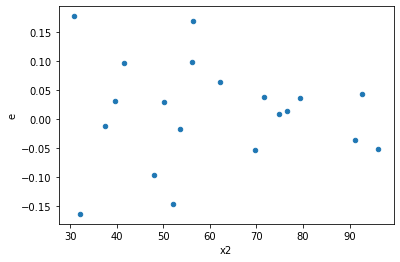

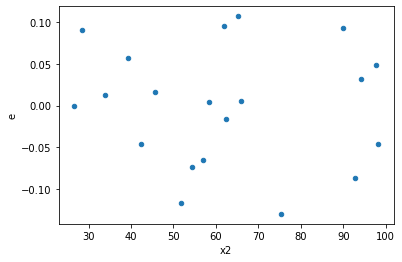

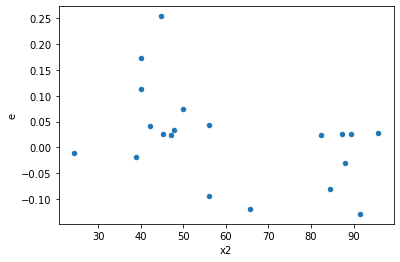

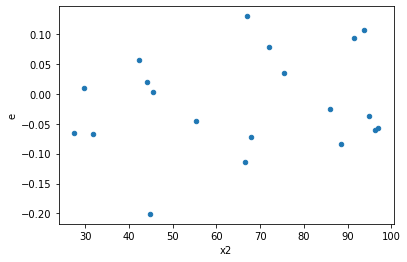

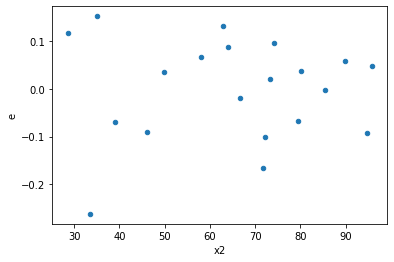

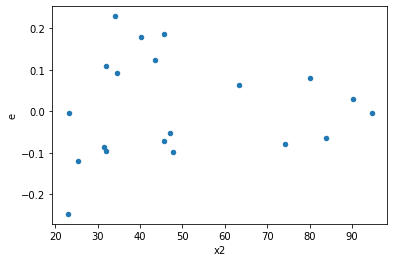

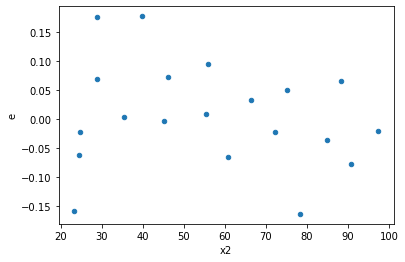

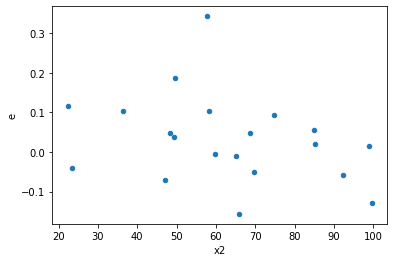

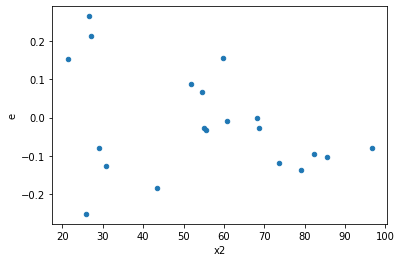

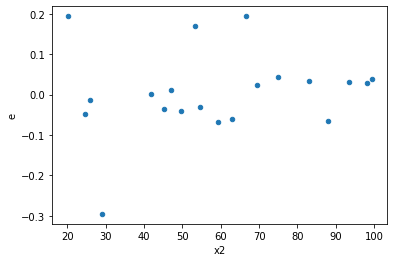

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,10.0,0.009036886952141929,0.07383999476253991,0.002259221738035482,0.007383999476253992,3.26838191751589,0.11721966255268179,0.9413901687236591,0.058609831276340896,Reject001=1 : Homoscedasticity
1.0,3.0,11.0,0.011661131116524519,0.04701029804894997,0.003887043705508173,0.0042736634589954515,1.0994637011514472,0.7806954809205746,0.6096522595397127,0.3903477404602873,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,0.04457232118632149,0.1274702740923259,0.007428720197720249,0.015933784261540736,2.1448895418662492,0.3139441898788493,0.8430279050605753,0.15697209493942466,Reject001=1 : Homoscedasticity
5.0,10.0,4.0,0.14964366758684206,0.06731632482086598,0.014964366758684206,0.016829081205216496,1.124610314395706,0.9902861956509532,0.5048569021745234,0.4951430978254766,Reject001=1 : Homoscedasticity
8.0,9.0,5.0,0.11013782799207841,0.08518680455169919,0.012237536443564269,0.01703736091033984,1.3922214645824245,0.7482533980428041,0.625873300978598,0.37412669902140205,Reject001=1 : Homoscedasticity
10.0,5.0,9.0,0.00624305169516941,0.06953207427597807,0.001248610339033882,0.00772578603066423,6.187507654823756,0.01867497721145872,0.9906625113942706,0.00933748860572936,Reject001=1 : Homoscedasticity
13.0,7.0,7.0,0.020986790310372858,0.024833877157573417,0.002998112901481837,0.0035476967367962025,1.1833099197307513,0.829960392773077,0.5850198036134615,0.4149801963865385,Reject001=1 : Homoscedasticity
15.0,7.0,7.0,0.016969245245559622,0.04740724916748633,0.002424177892222803,0.006772464166783761,2.7937158359999237,0.1986732029334326,0.9006633985332837,0.0993366014667163,Reject001=1 : Homoscedasticity
20.0,11.0,3.0,0.03777662834438512,0.03752703676132513,0.003434238940398647,0.012509012253775043,3.64244086415344,0.3148787126785666,0.8425606436607167,0.1574393563392833,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,10.0,0.009036886952141929,0.07383999476253991,0.002259221738035482,0.007383999476253992,3.26838191751589,0.11721966255268179,Reject001=1 : Homoscedasticity
1.0,3.0,11.0,0.011661131116524519,0.04701029804894997,0.003887043705508173,0.0042736634589954515,1.0994637011514472,0.7806954809205746,Reject001=1 : Homoscedasticity
2.0,12.0,2.0,0.09460474822110441,0.009510224556188086,0.007883729018425368,0.004755112278094043,0.6031552158858691,0.4626611262995452,Reject001=1 : Homoscedasticity
3.0,15.0,1.0,0.08268931334327169,2.0194839173657902e-28,0.005512620889551446,2.0194839173657902e-28,3.663382550382696e-26,4.544572182819514e-183,Reject001=0 : Heteroscedasticity
4.0,6.0,8.0,0.04457232118632149,0.1274702740923259,0.007428720197720249,0.015933784261540736,2.1448895418662492,0.3139441898788493,Reject001=1 : Homoscedasticity
5.0,10.0,4.0,0.14964366758684206,0.06731632482086598,0.014964366758684206,0.016829081205216496,1.124610314395706,0.9902861956509532,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,0.04971658184330181,0.04786843378705705,0.008286096973883635,0.005983554223382132,0.7221197437395767,0.711158346221248,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,0.14931458619759413,0.06057490359028348,0.021330655171084876,0.008653557655754783,0.40568644452540104,0.25689868322029374,Reject001=1 : Homoscedasticity
8.0,9.0,5.0,0.11013782799207841,0.08518680455169919,0.012237536443564269,0.01703736091033984,1.3922214645824245,0.7482533980428041,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      846
Reject001=0 : Heteroscedasticity    154
Name: Result_test, dtype: int64